# PROJECT PROPOSAL

# *Using **Cholesterol** and **ST Depression Induced by Exercise** to Classify Cardiovascular Disease*

##### DSCI 100 002 - Matthew Bisset

## Introduction:

Cardiovascular disease (CVD), commonly referred to as heart disease, is a broad term encompassing a range of conditions that affect the heart and blood vessels. These conditions include coronary artery disease, heart attack, heart failure, and arrhythmias, among others. As a leading cause of death globally, CVD has significant health, economic, and societal impacts.

In this project, I will utilize the Cleveland heart disease dataset from the UCI Machine Learning Repository, which contains detailed records of 303 patients, including demographics, medical history, and diagnostic test results. This dataset will help us analyze the interactions between various risk factors and their collective impact on heart disease prediction.

This project aims to answer the question: **Can we predict classify a diagnosis of CVS using values for Cholesterol and ST Depression Induced by Exercise?** 

## Preliminary Exploratory Data Analysis:


In [1]:
#Import Libraries 
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# reading the data frame from the provided folder, assigning col names and types
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data",
                            col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                            col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f", "f", "d")
                          )

# cleaning and wrangling data
cleveland_data[ cleveland_data == "?" ] <- NA

data_clean <- cleveland_data |>
    mutate(diagnosis = ifelse(is.na(num), NA, (num > 0))) |>
    mutate(
        sex = factor(sex, levels = c(0, 1), labels = c("female", "male")),
        cp = factor(cp, levels = c(1, 2, 3, 4), labels = c("t_angina", "at_angina", "non_anginal", "asympt")),
        fbs = factor(fbs, levels = c(0, 1), labels = c("FALSE", "TRUE")),
        restecg = factor(restecg, levels = c(0, 1, 2), labels = c("normal", "wave_ab", "hyper")),
        exang = factor(exang, levels = c(0, 1), labels = c("FALSE", "TRUE")),
        slope = factor(slope, levels = c(1, 2, 3), labels = c("up", "flat", "down")),
        thal = factor(as.numeric(as.character(thal)), levels = c(3, 6, 7), labels = c("normal", "fixed", "reversible")),
        ca = as.factor(as.integer(ca))
  )

head(data_clean)

#summarizing predictors and the number of diagnoses in each category 
data_summary_pred <- data_clean |>
                    group_by(diagnosis) |>
                    summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                              min_oldpeak = min(oldpeak), max_oldpeak = max(oldpeak), mean_thalach = mean(oldpeak),
                              n_of_patients = n())

data_summary_pred

# I want to count the number of occurrences of TRUE and FALSE diagnoses based on all the factors (cp, fbs, restecg, exang, slope, ca, thal) 
# but I can't figure out how. (ie how many TRUE diagnoses for each cp category and so on) 

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
63,male,t_angina,145,233,TRUE,hyper,150,FALSE,2.3,down,1,fixed,0,FALSE
67,male,asympt,160,286,FALSE,hyper,108,TRUE,1.5,flat,2,normal,2,TRUE
67,male,asympt,120,229,FALSE,hyper,129,TRUE,2.6,flat,3,reversible,1,TRUE
37,male,non_anginal,130,250,FALSE,normal,187,FALSE,3.5,down,1,normal,0,FALSE
41,female,at_angina,130,204,FALSE,hyper,172,FALSE,1.4,up,1,normal,0,FALSE
56,male,at_angina,120,236,FALSE,normal,178,FALSE,0.8,up,1,normal,0,FALSE


diagnosis,min_age,max_age,mean_age,min_trestbps,max_trestbps,mean_trestbps,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach,min_oldpeak,max_oldpeak,n_of_patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,29,76,52.58537,94,180,129.2500,126,564,242.6402,96,202,0.5865854,0,4.2,164
TRUE,35,77,56.62590,100,200,134.5683,131,409,251.4748,71,195,1.5741007,0,6.2,139


Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(Vars)

  # Now:
  data %>% select(all_of(Vars))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


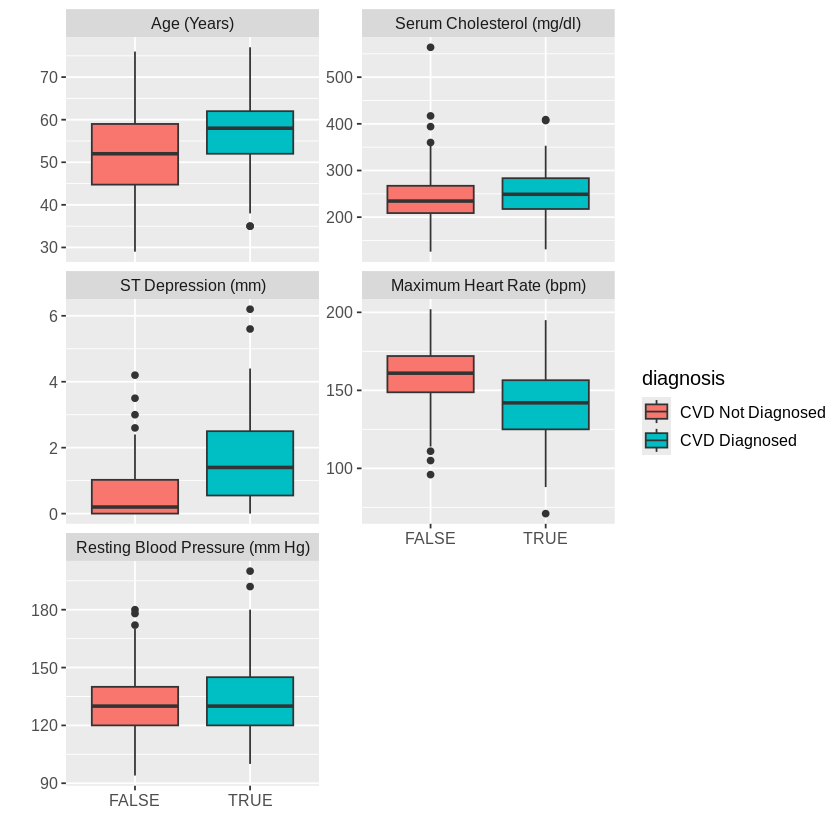

In [3]:
Vars <- c("age", "trestbps", "chol", "thalach", "oldpeak")
titles <- c("Age (Years)", "Resting Blood Pressure (mm Hg)", "Serum Cholesterol (mg/dl)", "Maximum Heart Rate (bpm)", "ST Depression (mm)")

# These boxplots show the distribution of observations for each numerical variable and how that relates to the factors of diagnoses 
boxplot_main <- data_clean |> 
    pivot_longer(cols = Vars, names_to = "Variable") |> 
    ggplot(aes(y = value, x = diagnosis, fill = diagnosis))+
    geom_boxplot()+
    labs(y = " ", x = " ") + 
    scale_fill_discrete(labels = c("CVD Not Diagnosed", "CVD Diagnosed")) +
    theme(text = element_text(size = 12)) +
    facet_wrap(~ Variable, scales = "free_y", nrow = 3, labeller = labeller(Variable = as_labeller(setNames(titles, Vars))))

boxplot_main

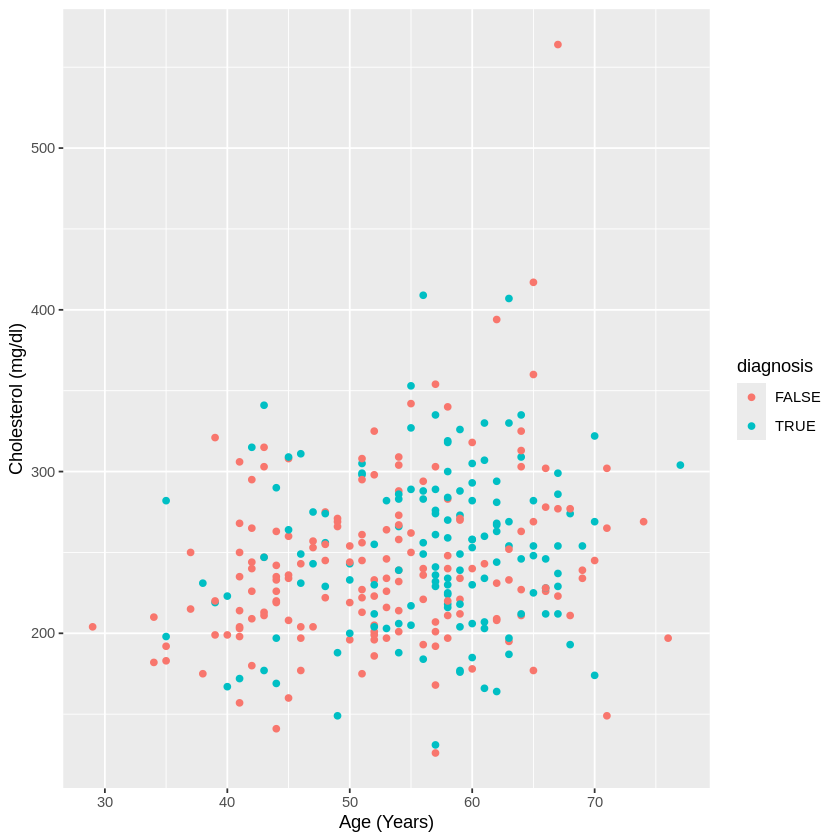

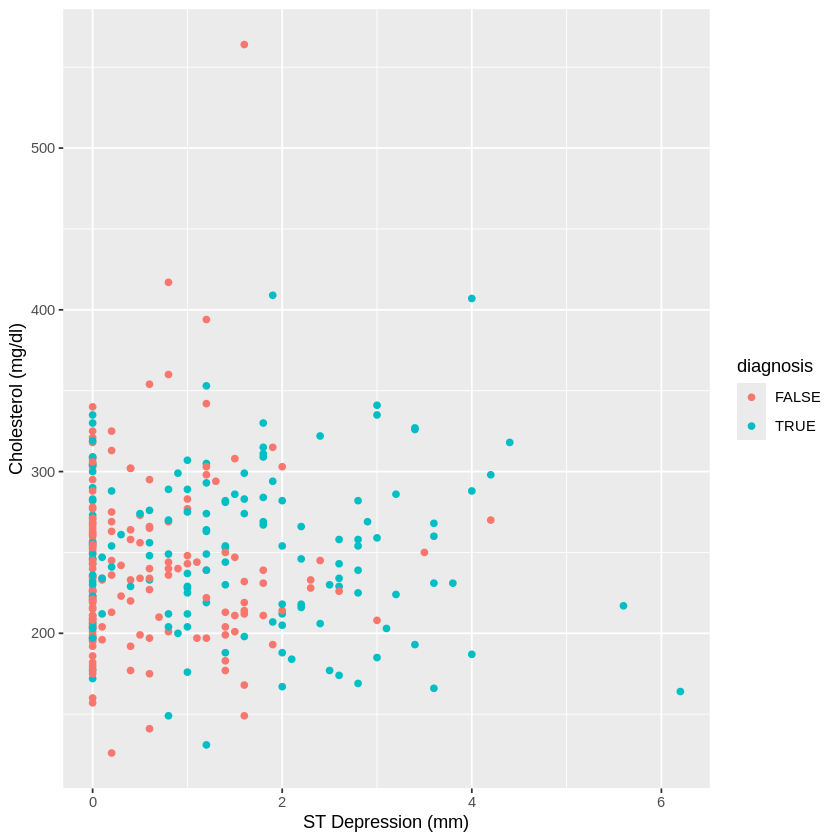

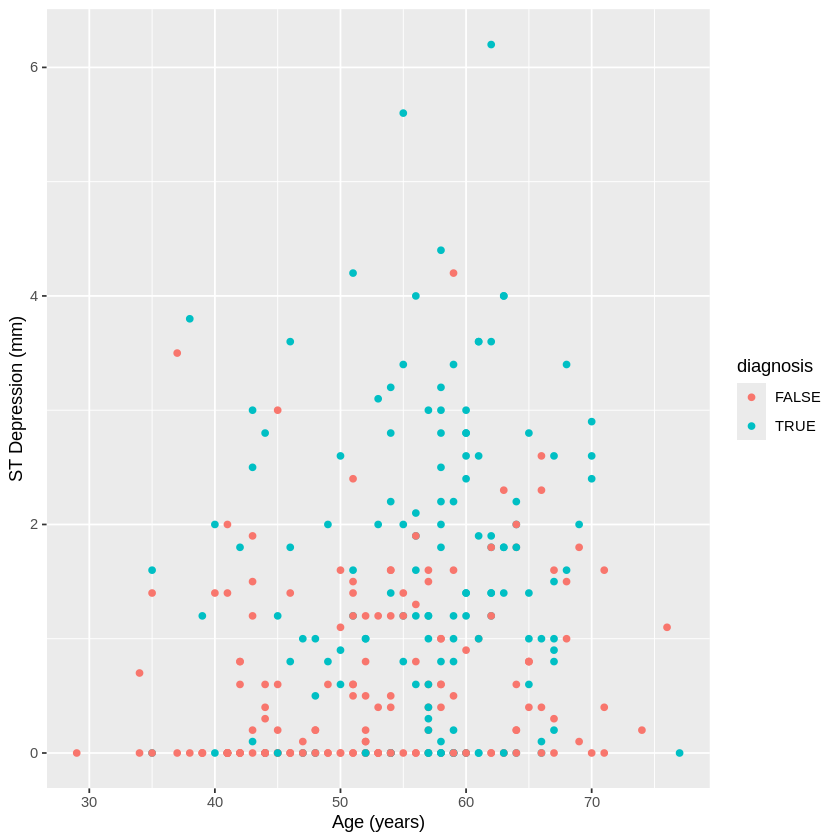

In [4]:
plot_chol_vs_age <- ggplot(data_clean, aes(x = age, y = chol, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Age (Years)", y = "Cholesterol (mg/dl)", color = "diagnosis")

plot_chol_vs_oldpeak <- ggplot(data_clean, aes(x = oldpeak, y = chol, color = diagnosis)) +
                 geom_point() +
                 labs(x = "ST Depression (mm)", y = "Cholesterol (mg/dl)", color = "diagnosis")

plot_oldpeak_vs_age <- ggplot(data_clean, aes(x = age, y = oldpeak, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "ST Depression (mm)", color = "diagnosis")

plot_chol_vs_age
plot_chol_vs_oldpeak
plot_oldpeak_vs_age

## Methods

I am using the *processed.cleveland.data* from the Heart Disease Database (originally collected from the Cleveland Clinic Foundation) to categorize if a patient from Cleveland might have heart disease. The variable table is shown below: 

| Variable Name | Role    | Type        | Description                                                                                                                                      | Units | Missing Values |
|---------------|---------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| age           | Feature | Integer     | Age                                                                                                                                              | years | no             |
| sex           | Feature | Categorical | 1 = male, 0 = female                                                                                                                             |       | no             |
| cp            | Feature | Categorical | chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)                                                |       | no             |
| trestbps      | Feature | Integer     | resting blood pressure (on admission to the hospital)                                                                                            | mm Hg | no             |
| chol          | Feature | Integer     | serum cholestoral                                                                                                                                | mg/dl | no             |
| fbs           | Feature | Categorical | fasting blood sugar &amp;amp;gt; 120 mg/dl (1 = True, 0 = False)                                                                                 |       | no             |
| restecg       | Feature | Categorical | resting electrocardiographic results (0 = normal, 1 = wave abnormality, 2 = probable or definite left ventricular hypertrophy (Estes' criteria)) |       | no             |
| thalach       | Feature | Integer     | maximum heart rate achieved                                                                                                                      | bpm   | no             |
| exang         | Feature | Categorical | exercise induced angina (1 = True, 0 = False)                                                                                                    |       | no             |
| oldpeak       | Feature | Integer     | ST depression induced by exercise relative to rest                                                                                               |   mm    | no             |
| slope         | Feature | Categorical | slope of the peak exercise ST segment (1 = upsloping , 2 = flat, 3 = downsloping)                                                                |       | no             |
| ca            | Feature | Integer     | number of major vessels (0-3) colored by flourosopy                                                                                              |       | yes            |
| thal          | Feature | Categorical | thallium stress (3 = normal, 6 = fixed defect, 7 = reversible defect)                                                                            |       | yes            |
| num           | Target  | Integer     | diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)                                                                                 |       | no             |

#### Data Import: 
The data is imported from the provided folder using read_csv(). Column names and data types are specified using col_names and col_types parameters, respectively.

#### Data Cleaning: 
Any "?" values in the data are replaced with NA using cleveland_data[ cleveland_data == "?" ] <- NA.

#### Data Wrangling:
- A new column diagnosis is created based on the num column. If num is NA, diagnosis is set to NA. Otherwise, it's set to TRUE if num > 0, indicating a positive diagnosis, and FALSE otherwise.
- Factor variables are converted to their appropriate levels and labels using factor().
- The thal and ca variables are converted to factors after converting them to numeric types.

#### Data Summary: 
Summary statistics of predictors (age, trestbps, chol, thalach, oldpeak) and the number of diagnoses in each category are calculated using group_by() and summarize() functions.

#### Future Data Analysis
For classification purposes, I will utilize the K-Nearest Neighbors (KNN) algorithm. KNN is a non-parametric method used for both classification and regression tasks. In the context of classifying a diagnosis of CVD, KNN operates by assigning a new data point to the majority class among its k nearest neighbours.

The conceptual steps are as follows:
1. **Distance Calculation:** KNN calculates the distance between the new data point and all other points in the dataset.
2. **Nearest Neighbors:** It identifies the k nearest neighbours of the new data point based on the calculated distances.
3. **Majority Vote:** The algorithm assigns the class label to the new data point based on the majority class among its k nearest neighbours. If k = 1, the new data point is assigned the class of its closest neighbour.

In this case, I will use the features 'chol' (cholesterol levels) and 'oldpeak' (ST depression induced by exercise) to classify a diagnosis of CVD as positive or negative. By setting a value for k and measuring the distances between the new data point and existing data points, the algorithm will determine the class label for the new data point based on the majority class among its k nearest neighbours. This approach allows for straightforward classification of CVD diagnoses based on the provided features.

## Expected Outcomes and Significance:


### Expected Findings

Based on the initial examination of the data, I believe that Cholesterol and ST Depression will be strong classifiers for CVD. 

### Impact of Findings

Having a classification system for heart disease could streamline and enhance the accuracy of diagnoses by doctors, leading to earlier and more effective treatment for patients. More specifically: 
- **Improved Prediction:** More accurate heart disease risk models, enhancing early detection.
- **Targeted Care:** Personalized prevention and treatment plans based on individual risk profiles.
- **Healthcare Efficiency:** Reduced costs and better patient outcomes through early and targeted interventions.

### Future Questions

- What other factors influence or have a similar influence to Cholesterol and ST Depression on CVD diagnoses?
- Are these same trend applicable to datasets from other regions? 